In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [2]:
# 防止画图中文乱码
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 定义神经网络的激活函数为sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
df_src_data = pd.DataFrame(columns=["x1", "x2", "x3", "y1", "y2", "y3"])

In [5]:
df_src_data.loc[0] = [0.92, 0.87, 0.88, 1, 0, 0]
df_src_data.loc[1] = [0.83, 0.79, 0.91, 1, 0, 0]
df_src_data.loc[2] = [0.77, 0.82, 0.76, 0, 1, 0]
df_src_data.loc[3] = [0.68, 0.69, 0.79, 0, 1, 0]
df_src_data.loc[4] = [0.54, 0.46, 0.42, 0, 0, 1]
df_src_data.loc[5] = [0.50, 0.41, 0.38, 0, 0, 1]

df_src_data.loc[6] = [0.79, 0.95, 0.93, 1, 0, 0]
df_src_data.loc[7] = [0.77, 0.80, 0.88, 1, 0, 0]
df_src_data.loc[8] = [0.81, 0.68, 0.76, 0, 1, 0]
df_src_data.loc[9] = [0.63, 0.61, 0.64, 0, 1, 0]
df_src_data.loc[10] = [0.38, 0.41, 0.45, 0, 0, 1]
df_src_data.loc[11] = [0.35, 0.45, 0.47, 0, 0, 1]

df_src_data.loc[12] = [0.91, 0.86, 0.94, 1, 0, 0]
df_src_data.loc[13] = [0.81, 0.77, 0.84, 1, 0, 0]
df_src_data.loc[14] = [0.72, 0.70, 0.78, 0, 1, 0]
df_src_data.loc[15] = [0.60, 0.59, 0.75, 0, 1, 0]
df_src_data.loc[16] = [0.42, 0.39, 0.47, 0, 0, 1]
df_src_data.loc[17] = [0.40, 0.35, 0.48, 0, 0, 1]

In [6]:
df_src_data

,x1,x2,x3,y1,y2,y3
0,0.92,0.87,0.88,1.0,0.0,0.0
1,0.83,0.79,0.91,1.0,0.0,0.0
2,0.77,0.82,0.76,0.0,1.0,0.0
3,0.68,0.69,0.79,0.0,1.0,0.0
4,0.54,0.46,0.42,0.0,0.0,1.0
5,0.50,0.41,0.38,0.0,0.0,1.0
6,0.79,0.95,0.93,1.0,0.0,0.0
7,0.77,0.80,0.88,1.0,0.0,0.0
8,0.81,0.68,0.76,0.0,1.0,0.0
9,0.63,0.61,0.64,0.0,1.0,0.0


### 分割样本数据为输入a_1和期望输出y

In [7]:
np_tmp = df_src_data.to_numpy()

In [8]:
# 为每一层的输入添加偏置单元a0，其值为1
def add_ones(mat1):
    tmp_ones = np.ones(len(mat1))
    return np.c_[tmp_ones, mat1]

In [9]:
X = np_tmp[:, :3]
y = np_tmp[:, 3:]
a_1 = X.copy()

a_1 = np.matrix(a_1)
y = np.matrix(y)

# a_1为输入
a_1 = add_ones(a_1)

In [10]:
# 实例个数
m = a_1.shape[0]

### 参数随机初始化

In [11]:
# 层数
L = 4
# 每一层的神经元数目(不包括偏置单元),下标0处做占位使用
n_l = np.array([0, 3, 3, 3, 3])

In [12]:
# 权重参数初始化，此处4层神经网络，每层神经元数都相等，为3个
# 但考虑到实际使用中每个权重矩阵行、列数不一定相等，不方便使用numpy多维数组
# 偏置参数也是同样考虑，每一层的偏置b实际中长度不一定相同
# 故使用list
list_w = [0]
for i in range(1, L):
    tmp = np.random.uniform(-0.2, 0.2, size=(n_l[i+1], n_l[i]))
    list_w.append( np.matrix(tmp) )

# 偏置参数初始化
list_b = [0]
for i in range(1, L):
    tmp = np.random.uniform(-0.2, 0.2, size=n_l[i+1])
    list_b.append( np.matrix(tmp).T )

In [13]:
list_b[1]

matrix([[-0.08929811],
        [-0.0191275 ],
        [-0.18034734]])

In [14]:
list_w[1]

matrix([[-0.08979544, -0.01783778,  0.13780318],
        [ 0.13549892,  0.17583641, -0.07606261],
        [ 0.13185446,  0.05224218, -0.1285524 ]])

## 第一次将整个计算过程分步展示(到求完偏导部分)，后面多次迭代时再编写对应的函数
## 前向传播

In [15]:
z_2 = np.dot( np.c_[list_b[1], list_w[1]], a_1.T).T #18*3
a_2 = sigmoid(z_2)

In [16]:
# 添加偏置单元a^2_0 = 1
a_2 = add_ones(a_2)

In [17]:
a_2

matrix([[1.        , 0.48346553, 0.54774758, 0.46836316],
        [1.        , 0.4868732 , 0.54066756, 0.46341065],
        [1.        , 0.48292235, 0.5427913 , 0.46662952],
        [1.        , 0.4865526 , 0.53351204, 0.4610303 ],
        [1.        , 0.47798532, 0.52572236, 0.46527934],
        [1.        , 0.47772872, 0.52293666, 0.46459666],
        [1.        , 0.48774609, 0.54592594, 0.46353834],
        [1.        , 0.48714183, 0.53965173, 0.46253242],
        [1.        , 0.48264905, 0.53802339, 0.46612189],
        [1.        , 0.48286765, 0.53116379, 0.46314575],
        [1.        , 0.48282615, 0.5175495 , 0.45842821],
        [1.        , 0.48400895, 0.51791085, 0.45732683],
        [1.        , 0.48579945, 0.54584511, 0.46598493],
        [1.        , 0.48500129, 0.54044346, 0.46473297],
        [1.        , 0.48526657, 0.53548732, 0.46279055],
        [1.        , 0.48741584, 0.52719024, 0.45838994],
        [1.        , 0.48270654, 0.51764487, 0.45883994],
        [1.   

In [18]:
z_3 = np.dot( np.c_[list_b[2], list_w[2]], a_2.T).T #18*3
a_3 = sigmoid(z_3)

# 添加偏置单元a^3_0 = 1
a_3 = add_ones(a_3)

In [19]:
z_4 = np.dot( np.c_[list_b[3], list_w[3]], a_3.T).T #18*3
#此处a_4即为假设函数最终输出，每一行是3个输出单元的值
a_4 = sigmoid(z_4)

In [20]:
a_4

matrix([[0.42839745, 0.43157016, 0.50614873],
        [0.42839799, 0.43156524, 0.50614677],
        [0.42839835, 0.43157026, 0.50615168],
        [0.42839886, 0.43156476, 0.50615068],
        [0.42839952, 0.4315739 , 0.50616871],
        [0.42839974, 0.43157385, 0.50617056],
        [0.42839834, 0.431565  , 0.50614193],
        [0.42839837, 0.43156484, 0.50614657],
        [0.42839802, 0.43156986, 0.50615524],
        [0.4283991 , 0.43156882, 0.50615789],
        [0.42840052, 0.4315672 , 0.50616461],
        [0.42840074, 0.43156589, 0.50616225],
        [0.42839752, 0.43156715, 0.50614594],
        [0.42839809, 0.43156744, 0.50614989],
        [0.42839861, 0.43156652, 0.50615187],
        [0.4283993 , 0.43156293, 0.50615256],
        [0.42840026, 0.43156732, 0.506165  ],
        [0.42840036, 0.43156582, 0.50616484]])

## 误差反向传播
[参考链接](https://blog.csdn.net/wu740027007/article/details/100884238)

In [21]:
# 写出2种形式代价函数：二次和交叉熵
def cost_1(a_4, y):
    tmp = np.power(a_4-y, 2) / 2
    return np.sum(tmp) / m

def cost_2(a_4, y):
    first = np.multiply(-y, np.log(a_4))
    second = np.multiply((1 - y), np.log(1 - a_4))
    return np.sum(first - second) / m

### 计算输出层delta（二次代价函数形式）

In [22]:
tmp = np.multiply(a_4, 1-a_4)
delta_L = np.multiply((a_4 -y), tmp)

### 计算隐藏层delta

In [23]:
tmp = np.multiply(a_3, 1-a_3)[:, 1:]
delta_3 = np.multiply( np.dot(list_w[3].T, delta_L.T).T, tmp)

In [24]:
tmp = np.multiply(a_2, 1-a_2)[:, 1:]
delta_2 = np.multiply( np.dot(list_w[2].T, delta_3.T).T, tmp)

### 计算权重参数w对代价函数的偏导

In [25]:
partial_w_3 = np.zeros(list_w[3].shape)

for i in range(m):
    partial_w_3 += np.dot(delta_L[i].T, a_3[:, 1:][i])

In [26]:
partial_w_2 = np.zeros(list_w[2].shape)

for i in range(m):
    partial_w_2 += np.dot(delta_3[i].T, a_2[:, 1:][i])

In [27]:
partial_w_1 = np.zeros(list_w[1].shape)

for i in range(m):
    partial_w_1 += np.dot(delta_2[i].T, a_1[:, 1:][i])

### 计算偏置参数b对代价函数的偏导

In [28]:
partial_b_3 = np.zeros(list_b[3].shape)
partial_b_2 = np.zeros(list_b[2].shape)
partial_b_1 = np.zeros(list_b[1].shape)

partial_b_3 += delta_L.sum(axis=0).T
partial_b_2 += delta_3.sum(axis=0).T
partial_b_1 += delta_2.sum(axis=0).T

## <font color="#dd0000">以上完成了1次求参数偏导的整个过程，下面开始定义函数具体实现该神经网络</font>

### 参数随机初始化

In [29]:
# 输入样本组数
m = X.shape[0]

# 神经网络层数
L = 4
# 每一层的神经元数目(不包括偏置单元),下标0处做占位使用
n_l = np.array([0, 3, 3, 3, 3])

In [30]:
# 使用随机数种子
np.random.seed(12345)
# 权重参数初始化，权重矩阵分别是w[1-3]
list_w = [0]
for i in range(1, L):
    tmp = np.random.uniform(-0.5, 0.5, size=(n_l[i+1], n_l[i]))
    list_w.append( np.matrix(tmp) )

# 偏置参数初始化,偏置矩阵分别是b[1-3]
list_b = [0]
for i in range(1, L):
    tmp = np.random.uniform(-0.5, 0.5, size=(n_l[i+1], 1))
    list_b.append( np.matrix(tmp) )

### 前向传播，计算所有输入值X根据w、b得到的输出值

In [31]:
def forward(input_x, list_b, list_w):
    a_1 = add_ones(np.matrix(input_x)) #添加偏置单元
    
    z_2 = np.dot( np.c_[list_b[1], list_w[1]], a_1.T).T
    a_2 = sigmoid(z_2)
    a_2 = add_ones(a_2) #添加偏置单元
    
    z_3 = np.dot( np.c_[list_b[2], list_w[2]], a_2.T).T
    a_3 = sigmoid(z_3)
    a_3 = add_ones(a_3) #添加偏置单元
    
    z_4 = np.dot( np.c_[list_b[3], list_w[3]], a_3.T).T
    a_4 = sigmoid(z_4)  #输出值，无偏置单元
    
    #list[0]做占位使用，各层神经元输出分别是a[1-4]
    return [0, a_1, a_2, a_3, a_4]

In [32]:
list_a = forward(X, list_b, list_w)

In [33]:
list_a[4]

matrix([[0.48898213, 0.49116167, 0.60896641],
        [0.48886684, 0.49111919, 0.60894982],
        [0.48867198, 0.49107933, 0.60886908],
        [0.48852252, 0.49103266, 0.6088335 ],
        [0.48784756, 0.49091369, 0.60852102],
        [0.48772984, 0.49088754, 0.60847538],
        [0.48894143, 0.49111426, 0.60901448],
        [0.48877865, 0.49109004, 0.60893168],
        [0.48862919, 0.49108751, 0.60882301],
        [0.48826627, 0.49098875, 0.60871287],
        [0.48766444, 0.49084009, 0.60850457],
        [0.48767592, 0.49083134, 0.60852779],
        [0.48902403, 0.49116243, 0.60899669],
        [0.48876395, 0.49110188, 0.60890094],
        [0.48856283, 0.49105042, 0.60883448],
        [0.48833104, 0.49098511, 0.60876769],
        [0.48771771, 0.49085907, 0.60851334],
        [0.48767981, 0.49084808, 0.60850284]])

### 误差反向传播，代价函数采用二次式

In [34]:
# sigmoid函数求导，列向量形式
def sigmoid_Derivation(c_vertor):
    return np.multiply(c_vertor, 1-c_vertor)

In [35]:
def BP(list_a):
    # 统计全部样本w的偏导值
    partial_w = [0]
    for i in range(1, L):
        tmp = np.zeros( (n_l[i+1], n_l[i]) )
        partial_w.append( np.matrix(tmp) )
    # 统计全部样本b的偏导值
    partial_b = [0]
    for i in range(1, L):
        tmp =  np.zeros( (n_l[i+1], 1) )
        partial_b.append( np.matrix(tmp) )

    # 逐一处理每一个样本
    for i in range(m):
        a_4 = list_a[4][i].T
        a_3 = list_a[3][i][:, 1:].T  #去掉偏置单元，并变成列向量
        a_2 = list_a[2][i][:, 1:].T
        a_1 = list_a[1][i][:, 1:].T

        # 计算输出层delta，取值为delta[2-4]
        #delta_L = np.multiply((a_4 - y[i].T), sigmoid_Derivation(a_4))
        # 交叉熵形式
        delta_L = a_4 - y[i].T

        # 计算隐藏层delta
        delta_3 = np.multiply( np.dot(list_w[3].T, delta_L), sigmoid_Derivation(a_3))
        delta_2 = np.multiply( np.dot(list_w[2].T, delta_3), sigmoid_Derivation(a_2))

        # 计算权重w的偏导
        partial_w_3 = np.dot(delta_L, a_3.T)
        partial_w_2 = np.dot(delta_3, a_2.T)
        partial_w_1 = np.dot(delta_2, a_1.T)
        # 计算偏置b的偏导
        partial_b_3 = delta_L
        partial_b_2 = delta_3
        partial_b_1 = delta_2

        # 累加所有样本
        partial_w[3] += partial_w_3
        partial_w[2] += partial_w_2
        partial_w[1] += partial_w_1

        partial_b[3] += partial_b_3
        partial_b[2] += partial_b_2
        partial_b[1] += partial_b_1

    return [partial_w, partial_b]

### 梯度下降法

In [36]:
#步长
step_alpha = 0.9

In [37]:
def grad_descent(list_w, list_b, partial_w, partial_b):
    for i in range(1, L):
        list_w[i] = list_w[i] - step_alpha/m * partial_w[i]
        list_b[i] = list_b[i] - step_alpha/m * partial_b[i]
    
    return [list_w, list_b]

In [38]:
df_cost = pd.DataFrame(columns=['steps', 'cost'])
# 迭代5000次
for i in range(0, 5000):
    list_a = forward(X, list_b, list_w)
    df_cost.loc[i] = [i, cost_2(list_a[4], y)]
    partial_w, partial_b = BP(list_a)
    
    list_w, list_b = grad_descent(list_w, list_b, partial_w, partial_b)

### 画出代价函数曲线

<IPython.core.display.Javascript object>


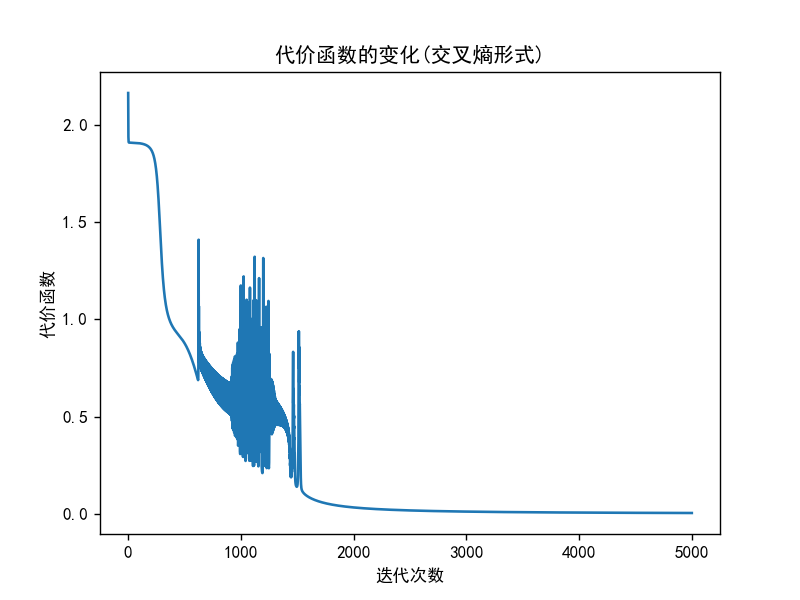

Text(0.5, 1.0, '代价函数的变化(交叉熵形式)')

In [39]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.plot(df_cost["steps"], df_cost["cost"] )
plt.xlabel("迭代次数")
plt.ylabel("代价函数")
plt.title("代价函数的变化(交叉熵形式)")

In [40]:
# 关闭科学计数法
np.set_printoptions(suppress=True)

In [41]:
forward([[0.79, 0.56, 0.59]], list_b, list_w)[4]

matrix([[0.00035287, 0.99592505, 0.00451943]])

In [42]:
cost_2(list_a[4], y)

0.004474907924797125